# ML 기초 실습

이번 실습에서는 Decision Tree를 이용한 분류/회귀를 진행하고, 학습된 모델의 성능을 평가하는 Evaluation을 진행해보도록 하겠습니다.

In [1]:
# 우선 데이터셋을 로드하기 위해 pandas와 numpy를 불러오겠습니다.
import pandas as pd
import numpy as np

# 경고는 가볍게 무시하도록 하겠습니다.
import warnings
warnings.filterwarnings(action='ignore')

## 1. Decision Tree - Classificiation

데이터는 회귀 교육 세션 때 이미 사용해봤던 심장병 예측 데이터 셋을 준비해봤습니다.

#### 1.1 데이터 로드 및 훓어보기

In [2]:
heart_classification = pd.read_csv("heart.csv")
heart_classification.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
# 데이터셋을 천천히 훑어보도록 하겠습니다.
# Column 개수가 많거나 변수에 str 타입의 데이터가 들어가게 된다면 그냥 보는 것보다 .info() method를 이용하면 좀 더 쉽게 데이터 정보를 파악할 수 있습니다.
# 다만, 이미 정수형으로 변환되어 있는 categorical data(범주형 데이터)는 continuous data로 인식합니다.
heart_classification.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


위 데이터에서 성별같은 경우 이미 남녀를 0과 1의 정수형으로 바꿔주었습니다.
하지만 안타깝게도 Scikit Learn의 Decision Tree에서는 정수형으로 바꿔줘도 continuous data로 인식하고 학습을 진행합니다. str으로 하면 오류가 나구요.
하지만 간단한 실습 데이터는 이 정도로만 해도 충분한 성능을 발휘합니다.

In [12]:
# 우리의 목표는 target입니다. 심장병 유무에 관련해 1,0으로 표기한겁니다.
# 결과를 보니 균일하게 잘 분포가 되어 있습니다.
heart_classification.groupby('target').size()

target
0    138
1    165
dtype: int64

#### 1.2  데이터 분할 및 학습

In [13]:
# sklearn에서 필요한 패키지들을 다시 불러옵니다.
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [14]:
# 원본 DataFrame에서 X, y를 따로 할당하고, train / test set으로 분할합니다

y = heart_classification.target
X = heart_classification.drop('target', axis = 1) #axix = 1 설정을 꼭 해주셔야 합니다. default가 0으로 설정되어 있습니다.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 
#test_size parameter 말고 train_size로도 설정이 가능합니다.

In [15]:
#Shift+Tab을 눌러보시면 criterion(불순도 지표 기준)으로 무엇을 선택할지부터 다양한 option을 볼 수 있습니다.
dt_clf = DecisionTreeClassifier(criterion='entropy') 

#학습을 진행합시다.
dt_clf.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy')

#### 1.3 Graphviz를 통한 시각화

<span style="color:red"><b> graphviz 패키지가 설치되어 있지 않다면 이 부분의 코드를 실행하지 마세요!</b></span> <br>

In [20]:
# graphviz 패키지를 통해 시각화를 진행할 수 있습니다.
# sklearn의 export_graphviz를 import 합니다.

from sklearn.tree import export_graphviz


# 결과물을 graphviz 패키지의 default 경로로 export할 겁니다.

export_graphviz(dt_clf,
                out_file=("heart_tree.dot"),
                feature_names=X_train.columns,
                class_names=['0','1'],
                rounded=True,
                filled=True)

In [21]:
# 이제 export 된 결과물을 다시 불러와야 합니다.
# graphviz 패키지와 os 패키지를 불러옵니다.

import graphviz
import os

os.environ["PATH"] += os.pathsep + 'C:/graphviz-2.38/release/bin'

with open("heart_tree.dot") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

#### 1.4 결과 확인

In [22]:
# .predict_proba는 target의 각 class의 확률을 반환합니다. 우리의 경우 1, 0 두가지 경우의 수이니 [a,b] x n의 array 반환하겠네요
# 이 부분은 궁금하시다면 직접 실행보시길 바랍니다.
# .predict는 해당 관측치의 예측값이 1일지 0일지를 반환해줍니다. 우리는 주로 이 predict method를 사용합니다.

proba = dt_clf.predict_proba(X_test)
prediction = dt_clf.predict(X_test)

print('※Prediction※', ' ', prediction, sep = '\n')

※Prediction※
 
[0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0
 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0]


In [23]:
# Confusion Matrix를 통해 분류 결과를 확인합시다.
# 참고로, Decision Tree는 continous data에 대해 Heuristic하게 node 분할을 진행하기 때문에, 동일 데이터라도 학습마다 결과값이 바뀝니다.

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report

matrix = confusion_matrix(y_test, prediction)
matrix

array([[26,  3],
       [ 8, 24]], dtype=int64)

In [24]:
# Sklearn에서도 confusion matrix를 제공하는데, 세션에서 보여드린 confusion matrix와 배열이 달라서 그냥 직접 보여드리겠습니다.

pd.DataFrame(matrix, columns = ['Negative', 'Positive'], index = ['False', 'True'] )

,Negative,Positive
False,26,3
True,8,24


In [25]:
print('Accuracy:: {}'.format(accuracy_score(y_test, prediction)),
      'F1_Score:: {}'.format(f1_score(y_test, prediction)),
      'ROC_AUC_Score:: {}'.format(roc_auc_score(y_test, prediction)), sep = '\n')

Accuracy:: 0.819672131147541
F1_Score:: 0.8135593220338982
ROC_AUC_Score:: 0.8232758620689656


In [26]:
print( classification_report(y_test, prediction) )

              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.89      0.75      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



#### 1.5 Pruned Tree & Grid Search

In [27]:
#성능을 더 좋게 만들기 위해서, pruning을 해보도록 하겠습니다.
#이번엔 entropy 대신 default 값인 gini를 사용하겠습니다.

pruned_dt_dlf = DecisionTreeClassifier(criterion='gini', max_depth = 4, max_leaf_nodes = 24)

In [28]:
pruned_dt_dlf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=24)

--------------------

<span style="color:red"><b> graphviz 패키지가 설치되어 있지 않다면 이 부분의 코드를 실행하지 마세요!</b></span> <br>

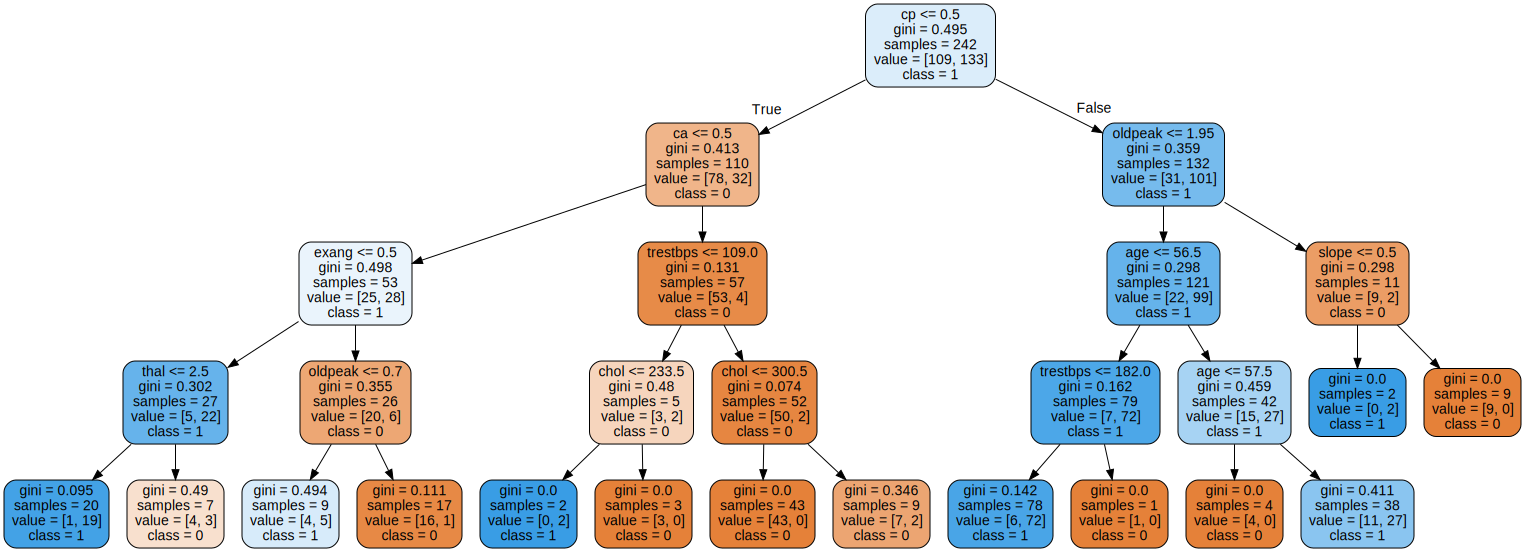

In [18]:
export_graphviz(pruned_dt_dlf,
                out_file=("pruned_heart.dot"),
                feature_names=X_train.columns,
                class_names=['0','1'],
                rounded=True,
                filled=True)

os.environ["PATH"] += os.pathsep + 'C:/graphviz-2.38/release/bin'

with open("pruned_heart.dot") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

-----------------

In [29]:
pruned_predicton = pruned_dt_dlf.predict(X_test)
print( classification_report(y_test, pruned_predicton) )

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



이렇게 parameter를 조정해주면 더 좋은 성능을 내는 모델을 만들어 낼 수도 있습니다.
하지만 매번 parameter를 일일히 실험해보면서 수정할 수는 없는 노릇입니다.
그래서 이를 효율적으로 해결해주는 것이 바로 GridSearch입니다.

In [30]:
# GridSearch는 모델 학습시에 최적의 parameter 값을 찾도록 도와주는 도구입니다. 반복 작업을 효율적으로 진행할 수 있습니다.
# 꼭 Decision Tree가 아니더라도, sklearn에서 지원하는 대부분의 알고리즘에 적용할 수 있습니다.
# GridSearch를 불러와주고, 새로운 tree 객체를 만듭시다

from sklearn.model_selection import GridSearchCV
grid_dt = DecisionTreeClassifier()


# 테스트 하고 싶은 parameter 값들을 parameter 별로 sequence 구조의 데이터(list, numpy array, etc...)에 넣어줍니다.
# 이 때 변수 이름은 꼭 모델 parameter 이름과 동일할 필요는 없습니다.

criterion = ['gini', 'entropy'] 
max_depth = [3,4,5]
max_leaf = [16,20,24]

#위의 세 parameter를 하나로 묶기 위해서 다음과 같은 Dictionary 형태로 만들어줍니다.
#여기서 key 값은 str 형태로, 정확하게 모델 parameter 이름과 동일해야 합니다.

parameter_grid = {'criterion': criterion,
                    'max_depth': max_depth,
                    'max_leaf_nodes': max_leaf}

In [31]:
gs = GridSearchCV(estimator= grid_dt, param_grid= parameter_grid, scoring= 'f1') 
# estimator는 우리가 사용하고자 하는 알고리즘 객체입니다. 위에서 grid_dt를 이미 할당해 놓았죠.
# scoring에는 str 형태의 인자가 들어갑니다. 'f1', 'roc_auc' ,'accuracy' 등을 사용할 수 있습니다.

gs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5],
                         'max_leaf_nodes': [16, 20, 24]},
             scoring='f1')

In [32]:
# gridsearch의 method중 .best_params, .best_score_가 있습니다. 각각 최적 parameter 조합과 해당 조합의 최고 성능을 나타냅니다

print('GridSearch 최적 parameter: {}'.format(gs.best_params_),
      'GridSearch 최고 Validation Score: {:.3f}'.format(gs.best_score_), sep = '\n')

GridSearch 최적 parameter: {'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 24}
GridSearch 최고 Validation Score: 0.794


여기서 Validation Score란, 아까 세션에서 언급했던 Validation data를 이용한 결과입니다. GridSearch에서는 자체적으로 입력한 Training set을 자동적으로 분할하여 Validation Set에서 가장 높은 점수를 보인 parameter 조합을 선택하여 모델로 선택합니다.

### 2. Decision Tree - Regression
Decision Tree는 Regression도 진행 가능합니다. 회귀 세션 실습에서 사용했던 BostonHousingData를 사용하겠습니다.

In [33]:
boston_regression = pd.read_csv("BostonHousingData.csv")
boston_regression.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,No,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,No,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,No,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,No,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,No,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [34]:
# nan 값들은 제거해줍니다.

boston_regression = boston_regression.dropna(axis = 0)

In [35]:
boston_regression.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non-null    float64
 2   INDUS    394 non-null    float64
 3   CHAS     394 non-null    object 
 4   NOX      394 non-null    float64
 5   RM       394 non-null    float64
 6   AGE      394 non-null    float64
 7   DIS      394 non-null    float64
 8   RAD      394 non-null    int64  
 9   TAX      394 non-null    int64  
 10  PTRATIO  394 non-null    float64
 11  B        394 non-null    float64
 12  LSTAT    394 non-null    float64
 13  MEDV     394 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 46.2+ KB


In [36]:
# CHAS를 보시면 float64가 아니라 object 타입입니다. LabelEncoder 사용해서 문자열을 정수형으로 mapping 해주겠습니다.

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [37]:
# .fit()으로 encoding할 column을 넣어줍니다.
label_encoder.fit(boston_regression.CHAS)

# .transform() 메소드로는 encoding완료된 column을 받아올 수 있습니다.
CHAS_encoded = label_encoder.transform(boston_regression.CHAS)

boston_regression.CHAS = CHAS_encoded
boston_regression.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [38]:
# LabelEncoder는 어떤 값이 어떤 숫자로 mapping 되었는지 바로 알려주지 않아서, 이렇게 임의로 확인해줘야 합니다.

print(label_encoder.classes_, "=>", label_encoder.transform(label_encoder.classes_))

['No' 'Yes'] => [0 1]


In [39]:
# 아까 했던 것처럼 train과 test를 분리해줍니다.
X = boston_regression.drop('MEDV', axis = 1)
y = boston_regression.MEDV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

In [40]:
# DecisionTree에서 regression 버전인 DecisionTreeRegressor를 불러옵니다.
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(max_depth= 5, max_leaf_nodes= 24)

dt_reg.fit(X_train, y_train)
reg_prediction = dt_reg.predict(X_test)

In [41]:
# 연속형 변수의 대표적인 평가지표는 R^2 입니다.

from sklearn.metrics import r2_score

print('{:.3f}'.format(r2_score(y_test, reg_prediction) ) )

0.801


In [42]:
# Linear Regression의 R^2 결과값과 비교해 봅시다.
# Categorical Data는 One-hot Encoding을 진행해 주도록 하죠.

from sklearn.linear_model import LinearRegression
linear = LinearRegression()

#Categorical Data는 우선 버려줍니다. One-Hot Encoding을 진행해 주셔도 무방합니다.
reg_X_train = X_train.drop(['CHAS'], axis = 1)
reg_X_test = X_test.drop(['CHAS'], axis =1)
# pd.get_dummies(X_train, columns = ['CHAS'])
# pd.get_dummies(X_test, columns = ['CHAS'])

linear.fit(reg_X_train, y_train)
linear_prediction = linear.predict(reg_X_test)

print("※결과 비교※",
      "Regression Tree:: {:.3f}".format(r2_score(y_test, reg_prediction)),
      "Linear Regression:: {:.3f}".format(r2_score(y_test, linear_prediction)), sep = '\n' )

※결과 비교※
Regression Tree:: 0.801
Linear Regression:: 0.755
